In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Set the parameters for the log-normal distribution
mean = 10  # mean of the log of the data
std_dev = 0.5  # standard deviation of the log of the data

In [7]:
num_people = 1000
salaries = np.random.lognormal(mean=mean, sigma=std_dev, size=num_people)

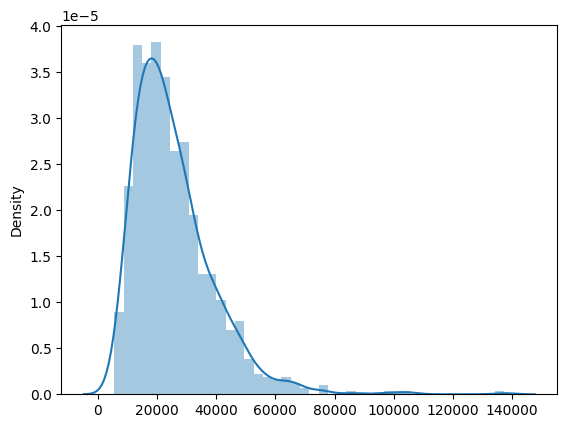

In [16]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
sns.distplot(salaries)
plt.show()

In [12]:
# calculate the mean of the salaries 
salaries.mean()

np.float64(25630.119827482667)

In [37]:
loops=1000
sample_meanss=[]
for i in range(10000):
    random=np.random.choice(salaries, size=100, replace=False)
    sample_meanss.append(random.mean())

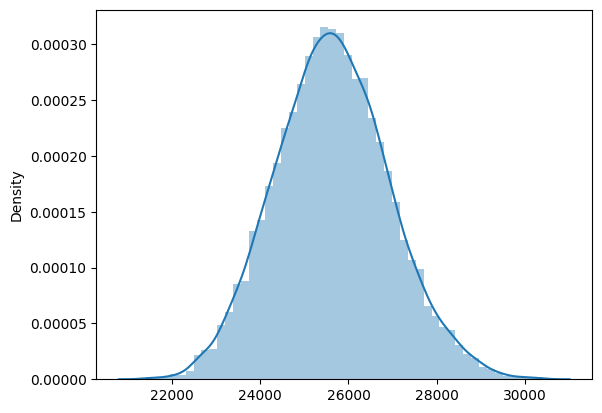

In [45]:
# draw the distplot ofthe sample means 
sns.distplot(sample_meanss)
plt.show()

In [39]:
np.array(sample_meanss).mean()  # central mean theorem salaries 

np.float64(25638.140786790962)

In [25]:
salaries.mean()  # actually means of the salary 

np.float64(25630.119827482667)

# perfrom the real world scanerios of the central limit theorems 

In [68]:
# perfrom the t test without the applying the central limit theorems 
sample_salaries=np.random.choice(salaries, size=100, replace=False)
print(sample_salaries.mean())

69633.35488917018


In [69]:
salaries.mean()  # actual salaries 

np.float64(68874.94773451173)

In [70]:
import scipy.stats as stats
print("population mean ",salaries.mean())
t_statistic, p_value = stats.ttest_1samp(sample_salaries,salaries.mean())
sample_mean = np.mean(sample_salaries)
sample_std = np.std(sample_salaries, ddof=1)  # Sample standard deviation (ddof=1 for unbiased estimate)
sample_size = len(sample_salaries)

print(f"Sample Mean: {sample_mean:.2f}")
print(f"Sample Standard Deviation: {sample_std:.2f}")
print(f"T-statistic: {t_statistic:.2f}")
print(f"P-value: {p_value:.4f}")
print("\n")

alpha = 0.05  

if p_value < alpha:
    print("We reject the null hypothesis. The sample mean salary is significantly different from the hypothesized population mean of $25630.1198.")
else:
    print("We fail to reject the null hypothesis. The sample mean salary is not significantly different from the hypothesized population mean of $25630.1198.")

population mean  68874.94773451173
Sample Mean: 69633.35
Sample Standard Deviation: 48327.11
T-statistic: 0.16
P-value: 0.8756


We fail to reject the null hypothesis. The sample mean salary is not significantly different from the hypothesized population mean of $25630.1198.


# apply the t stats test on the central limit theorems

In [71]:
# apply the t stats test on the central limit theorems
ctl_sample=np.random.choice(sample_meanss, size=50, replace=False)

In [72]:
t_statistic, p_value = stats.ttest_1samp(ctl_sample,salaries.mean())
print('population mean ',salaries.mean())
sample_mean = np.mean(ctl_sample)
sample_std = np.std(ctl_sample, ddof=1)  # Sample standard deviation (ddof=1 for unbiased estimate)
sample_size = len(ctl_sample)

print(f"Sample Mean: {sample_mean:.2f}")
print(f"Sample Standard Deviation: {sample_std:.2f}")
print(f"T-statistic: {t_statistic:.2f}")
print(f"P-value: {p_value:.4f}")
print("\n")

alpha = 0.05  

if p_value < alpha:
    print("We reject the null hypothesis. The sample mean salary is significantly different from the hypothesized population mean")
else:
    print("We fail to reject the null hypothesis. The sample mean salary is not significantly different from the hypothesized population mean ")

population mean  68874.94773451173
Sample Mean: 25719.14
Sample Standard Deviation: 1339.76
T-statistic: -227.77
P-value: 0.0000


We reject the null hypothesis. The sample mean salary is significantly different from the hypothesized population mean


In [47]:
np.array(sample_meanss).mean()  # central limit theorem 

np.float64(25638.140786790962)

In [48]:
ctl_sample.mean()

np.float64(26149.491500865206)

# UPDATED CODES

Population Mean: 68874.95

--- Without Applying CLT ---
Sample Mean: 69164.34
Sample Standard Deviation: 46165.13
T-statistic: 0.06
P-value: 0.9501
We fail to reject the null hypothesis. The sample mean salary is not significantly different from the population mean.

--- With Applying CLT ---
Sample Means Mean: 68930.97
Sample Means Standard Deviation: 4973.97
T-statistic (CLT): 0.36
P-value (CLT): 0.7218
We fail to reject the null hypothesis. The sample mean of the sample means is not significantly different from the population mean.


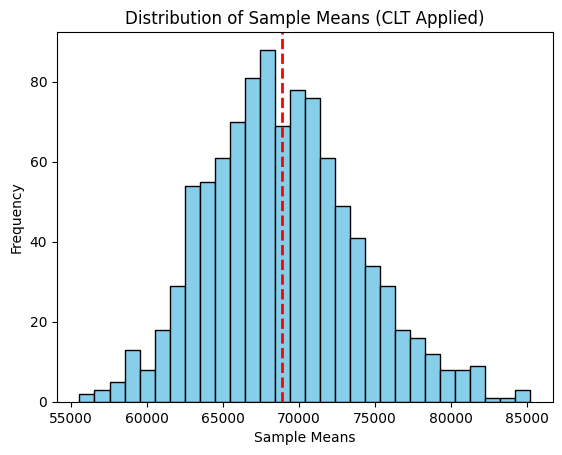

In [50]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Step 1: Generate Skewed Data (e.g., Salary data)
np.random.seed(42)
population_size = 10000
# Generate right-skewed salary data using an exponential distribution
salaries = np.random.exponential(scale=50000, size=population_size) + 20000  # Adding a base salary

# Population mean (True mean)
population_mean = np.mean(salaries)
print(f"Population Mean: {population_mean:.2f}")

# Step 2: Perform a t-test on a single random sample
sample_size = 100
sample_salaries = np.random.choice(salaries, size=sample_size, replace=False)
sample_mean = np.mean(sample_salaries)
sample_std = np.std(sample_salaries, ddof=1)  # Sample standard deviation (ddof=1 for unbiased estimate)

# Perform a one-sample t-test
t_statistic, p_value = stats.ttest_1samp(sample_salaries, population_mean)

print(f"\n--- Without Applying CLT ---")
print(f"Sample Mean: {sample_mean:.2f}")
print(f"Sample Standard Deviation: {sample_std:.2f}")
print(f"T-statistic: {t_statistic:.2f}")
print(f"P-value: {p_value:.4f}")

# Decision: Fail to reject the null hypothesis if p-value > 0.05
alpha = 0.05
if p_value < alpha:
    print("We reject the null hypothesis. The sample mean salary is significantly different from the population mean.")
else:
    print("We fail to reject the null hypothesis. The sample mean salary is not significantly different from the population mean.")


# Step 3: Apply Central Limit Theorem (CLT) - Create multiple sample means

# Generate 1000 random samples and calculate their means
num_samples = 1000
sample_means = []
for i in range(num_samples):
    sample = np.random.choice(salaries, size=sample_size, replace=False)
    sample_means.append(np.mean(sample))

# Convert sample means to numpy array
sample_means = np.array(sample_means)

# Step 4: Perform t-test on the distribution of sample means (CLT)
# We are comparing the mean of the sample means to the population mean
t_statistic_ctl, p_value_ctl = stats.ttest_1samp(sample_means, population_mean)

sample_mean_ctl = np.mean(sample_means)
sample_std_ctl = np.std(sample_means, ddof=1)  # Standard deviation of sample means

print(f"\n--- With Applying CLT ---")
print(f"Sample Means Mean: {sample_mean_ctl:.2f}")
print(f"Sample Means Standard Deviation: {sample_std_ctl:.2f}")
print(f"T-statistic (CLT): {t_statistic_ctl:.2f}")
print(f"P-value (CLT): {p_value_ctl:.4f}")

# Decision: Fail to reject the null hypothesis if p-value > 0.05
if p_value_ctl < alpha:
    print("We reject the null hypothesis. The sample mean of the sample means is significantly different from the population mean.")
else:
    print("We fail to reject the null hypothesis. The sample mean of the sample means is not significantly different from the population mean.")

# Step 5: Visualize the sample means distribution
plt.hist(sample_means, bins=30, color='skyblue', edgecolor='black')
plt.axvline(population_mean, color='red', linestyle='dashed', linewidth=2)
plt.title("Distribution of Sample Means (CLT Applied)")
plt.xlabel("Sample Means")
plt.ylabel("Frequency")
plt.show()


# for another randoms

Population Mean: 69845.75

--- Without Applying CLT ---
Sample Mean: 69709.06
Sample Standard Deviation: 47796.65
T-statistic: -0.03
P-value: 0.9772
We fail to reject the null hypothesis. The sample mean salary is not significantly different from the population mean.

--- With Applying CLT ---
Sample Means Mean: 69985.42
Sample Means Standard Deviation: 4982.49
T-statistic (CLT): 0.89
P-value (CLT): 0.3756
We fail to reject the null hypothesis. The sample mean of the sample means is not significantly different from the population mean.


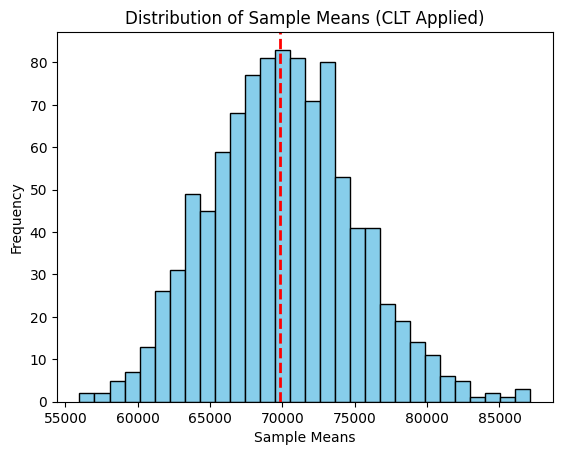

In [73]:
# Step 1: Generate Skewed Data (e.g., Salary data)
np.random.seed(100)
population_size = 10000
# Generate right-skewed salary data using an exponential distribution
salaries = np.random.exponential(scale=50000, size=population_size) + 20000  # Adding a base salary

# Population mean (True mean)
population_mean = np.mean(salaries)
print(f"Population Mean: {population_mean:.2f}")

# Step 2: Perform a t-test on a single random sample
sample_size = 100
sample_salaries = np.random.choice(salaries, size=sample_size, replace=False)
sample_mean = np.mean(sample_salaries)
sample_std = np.std(sample_salaries, ddof=1)  # Sample standard deviation (ddof=1 for unbiased estimate)

# Perform a one-sample t-test
t_statistic, p_value = stats.ttest_1samp(sample_salaries, population_mean)

print(f"\n--- Without Applying CLT ---")
print(f"Sample Mean: {sample_mean:.2f}")
print(f"Sample Standard Deviation: {sample_std:.2f}")
print(f"T-statistic: {t_statistic:.2f}")
print(f"P-value: {p_value:.4f}")

# Decision: Fail to reject the null hypothesis if p-value > 0.05
alpha = 0.05
if p_value < alpha:
    print("We reject the null hypothesis. The sample mean salary is significantly different from the population mean.")
else:
    print("We fail to reject the null hypothesis. The sample mean salary is not significantly different from the population mean.")


# Step 3: Apply Central Limit Theorem (CLT) - Create multiple sample means

# Generate 1000 random samples and calculate their means
num_samples = 1000
sample_means = []
for i in range(num_samples):
    sample = np.random.choice(salaries, size=sample_size, replace=False)
    sample_means.append(np.mean(sample))

# Convert sample means to numpy array
sample_means = np.array(sample_means)

# Step 4: Perform t-test on the distribution of sample means (CLT)
# We are comparing the mean of the sample means to the population mean
t_statistic_ctl, p_value_ctl = stats.ttest_1samp(sample_means, population_mean)

sample_mean_ctl = np.mean(sample_means)
sample_std_ctl = np.std(sample_means, ddof=1)  # Standard deviation of sample means

print(f"\n--- With Applying CLT ---")
print(f"Sample Means Mean: {sample_mean_ctl:.2f}")
print(f"Sample Means Standard Deviation: {sample_std_ctl:.2f}")
print(f"T-statistic (CLT): {t_statistic_ctl:.2f}")
print(f"P-value (CLT): {p_value_ctl:.4f}")

# Decision: Fail to reject the null hypothesis if p-value > 0.05
if p_value_ctl < alpha:
    print("We reject the null hypothesis. The sample mean of the sample means is significantly different from the population mean.")
else:
    print("We fail to reject the null hypothesis. The sample mean of the sample means is not significantly different from the population mean.")

# Step 5: Visualize the sample means distribution
plt.hist(sample_means, bins=30, color='skyblue', edgecolor='black')
plt.axvline(population_mean, color='red', linestyle='dashed', linewidth=2)
plt.title("Distribution of Sample Means (CLT Applied)")
plt.xlabel("Sample Means")
plt.ylabel("Frequency")
plt.show()

In [74]:
69845.75 -69709.06

136.69000000000233

In [75]:
69845.75-69985.42

-139.66999999999825